In [1]:
import argparse
import os

import numpy as np
import scipy.misc as ssc

import kitti_util

In [2]:
def generate_dispariy_from_velo(pc_velo, height, width, calib):
    pts_2d = calib.project_velo_to_image(pc_velo)
    fov_inds = (pts_2d[:, 0] < width - 1) & (pts_2d[:, 0] >= 0) & \
               (pts_2d[:, 1] < height - 1) & (pts_2d[:, 1] >= 0)
    fov_inds = fov_inds & (pc_velo[:, 0] > 2)
    imgfov_pc_velo = pc_velo[fov_inds, :]
    imgfov_pts_2d = pts_2d[fov_inds, :]
    imgfov_pc_rect = calib.project_velo_to_rect(imgfov_pc_velo)
    depth_map = np.zeros((height, width)) - 1
    imgfov_pts_2d = np.round(imgfov_pts_2d).astype(int)
    for i in range(imgfov_pts_2d.shape[0]):
        depth = imgfov_pc_rect[i, 2]
        depth_map[int(imgfov_pts_2d[i, 1]), int(imgfov_pts_2d[i, 0])] = depth
    baseline = 0.54

    disp_map = (calib.f_u * baseline) / depth_map
    return disp_map, depth

In [25]:
data_path = '/private/home/ruihan/Kitti/object/training/'
split_file = '/private/home/ruihan/Kitti/object/train.txt'
assert os.path.isdir(data_path)
lidar_dir = data_path + '/velodyne/'
calib_dir = data_path + '/calib/'
image_dir = data_path + '/image_2/'
disparity_dir = data_path + '/disparity/'

assert os.path.isdir(lidar_dir)
assert os.path.isdir(calib_dir)
assert os.path.isdir(image_dir)

if not os.path.isdir(disparity_dir):
    os.makedirs(disparity_dir)

lidar_files = [x for x in os.listdir(lidar_dir) if x[-3:] == 'bin']
lidar_files = sorted(lidar_files)

assert os.path.isfile(split_file)
with open(split_file, 'r') as f:
    file_names = [x.strip() for x in f.readlines()]

#for fn in lidar_files:
#     predix = fn[:-4]
#     if predix not in file_names:
#         continue
#     calib_file = '{}/{}.txt'.format(calib_dir, predix)
#     calib = kitti_util.Calibration(calib_file)
#     # load point cloud
#     lidar = np.fromfile(lidar_dir + '/' + fn, dtype=np.float32).reshape((-1, 4))[:, :3]
#     image_file = '{}/{}.png'.format(image_dir, predix)
#     image = ssc.imread(image_file)
#     height, width = image.shape[:2]
#     disp = generate_dispariy_from_velo(lidar, height, width, calib)
#     #np.save(disparity_dir + '/' + predix, disp)
#     print('Finish Disparity {}'.format(predix))

In [27]:
disp_all = []
depth_all = []
for i, fn in enumerate(lidar_files):
    if (i+1) % 100 == 0:
        print(i+1)
    predix = fn[:-4]
    if predix not in file_names:
        continue
        
    calib_file = '{}/{}.txt'.format(calib_dir, predix)
    calib = kitti_util.Calibration(calib_file)
    disp = np.load(disparity_dir + '/' + predix + '.npy')
    depth = (calib.f_u * 0.54) / disp
    disp_all.append(disp)
    depth_all.append(depth)
    #print(disp[disp > 0].shape)
    #break

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400


In [28]:
disp_all_vec = np.concatenate([disp[disp>0] for disp in disp_all])
depth_all_vec = np.concatenate([depth[depth>0] for depth in depth_all])

(array([23642709., 25055996.,  9686464.,  4807556.,  2886563.,  1762204.,
         1116526.,   738735.,   450081.,   228819.]),
 array([ 1.66839485,  9.47338993, 17.278385  , 25.08338007, 32.88837515,
        40.69337022, 48.49836529, 56.30336036, 64.10835544, 71.91335051,
        79.71834558]),
 <BarContainer object of 10 artists>)

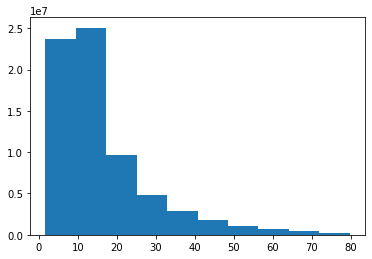

In [29]:
import matplotlib.pyplot as plt

plt.hist(depth_all_vec)